### Lab 4
### Ньяти Каелиле

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [ ]:
def generate_exponential(rate):
    u = np.random.rand()
    return -(1/rate) * np.log(u)

def simulate_single_channel_system(lambda_arrival, mu_service, Tw_max, T_simulation, num_runs=10):
    """
    Simulate a single-channel queuing system with limited waiting time.
    
    Parameters:
    lambda_arrival: arrival rate (1/sec)
    mu_service: service rate (1/sec)
    Tw_max: maximum allowable waiting time (sec)
    T_simulation: total simulation time (sec)
    num_runs: number of simulation runs for statistical stability
    
    Returns:
    Dictionary containing average results across all runs
    """
    
    # Initialize accumulators for results
    total_processed = 0
    total_rejected = 0
    total_idle_time = 0
    total_waiting_time = 0
    total_requests = 0
    
    for run in range(num_runs):
        # Generate arrival times using exponential distribution
        arrival_times = []
        t = 0
        
        while True:
            # Generate inter-arrival time using exponential distribution
            dt = generate_exponential(lambda_arrival)
            t += dt
            
            # Stop if we exceed simulation time
            if t > T_simulation:
                break
            
            arrival_times.append(t)
        
        n_requests = len(arrival_times)
        total_requests += n_requests
        
        # Generate service times using exponential distribution
        service_times = []
        for _ in range(n_requests):
            service_time = generate_exponential(mu_service)
            service_times.append(service_time)
        
        # Initialize variables for this run
        service_end_time = 0  # Time when current service ends
        processed = 0
        rejected = 0
        idle_time = 0
        total_wait = 0
        
        for i in range(n_requests):
            # Generate random waiting time tolerance using linear distribution from 0 to Tw_max
            dtw = Tw_max * np.random.rand()  # Linear distribution [0, Tw_max]
            
            # Calculate when this request would timeout
            timeout_time = arrival_times[i] + dtw
            
            # Check if request can be served based on the three cases from the theory
            if timeout_time > service_end_time:
                # Request can be served
                if arrival_times[i] > service_end_time:
                    # Case 2: Server idle before arrival
                    idle_time += (arrival_times[i] - service_end_time)
                    service_end_time = arrival_times[i] + service_times[i]
                else:
                    # Case 3: Request waits in queue
                    wait_time = service_end_time - arrival_times[i]
                    total_wait += wait_time
                    service_end_time = service_end_time + service_times[i]
                processed += 1
            else:
                # Case 1: Request rejected (timeout before server available)
                rejected += 1
        
        # Accumulate results
        total_processed += processed
        total_rejected += rejected
        total_idle_time += idle_time
        total_waiting_time += total_wait
    
    # Calculate average results
    avg_processed = total_processed / num_runs
    avg_rejected = total_rejected / num_runs
    avg_total_requests = total_requests / num_runs
    avg_idle_time = total_idle_time / num_runs
    avg_waiting_time = total_waiting_time / num_runs
    
    # Calculate probabilities
    service_probability = avg_processed / avg_total_requests if avg_total_requests > 0 else 0
    rejection_probability = avg_rejected / avg_total_requests if avg_total_requests > 0 else 0
    
    # Calculate server utilization
    total_time = T_simulation
    busy_time = total_time - avg_idle_time
    utilization_probability = busy_time / total_time
    
    # Calculate average waiting time per request (only for processed requests)
    avg_wait_per_request = avg_waiting_time / avg_processed if avg_processed > 0 else 0
    
    results = {
        'processed_requests': avg_processed,
        'rejected_requests': avg_rejected,
        'total_requests': avg_total_requests,
        'service_probability': service_probability,
        'rejection_probability': rejection_probability,
        'idle_time': avg_idle_time,
        'total_waiting_time': avg_waiting_time,
        'avg_waiting_time': avg_wait_per_request,
        'utilization_probability': utilization_probability
    }
    
    return results

In [26]:
# Task 2: Run simulation with given parameters
print("=" * 60)
print("TASK 2: Simulation with given parameters")
print("=" * 60)

# Parameters from Task 2
lambda_arrival = 0.7  # [1/sec]
mu_service = 0.8      # [1/sec]
Tw_max = 1.0          # [sec]
T_simulation = 1000   # [sec]
num_runs = 10        # Number of runs for statistical stability

# Run simulation
results_task2 = simulate_single_channel_system(
    lambda_arrival, mu_service, Tw_max, T_simulation, num_runs
)

# Display results
print(f"\nInput Parameters:")
print(f"  Arrival rate (λ): {lambda_arrival} [1/sec]")
print(f"  Service rate (μ): {mu_service} [1/sec]")
print(f"  Max waiting time (Tw_max): {Tw_max} [sec]")
print(f"  Simulation time: {T_simulation} [sec]")
print(f"  Number of runs: {num_runs}")

print(f"\nOutput Characteristics:")
print(f"  Number of processed requests: {results_task2['processed_requests']:.2f}")
print(f"  Number of rejected requests: {results_task2['rejected_requests']:.2f}")
print(f"  Total requests: {results_task2['total_requests']:.2f}")
print(f"  Service probability: {results_task2['service_probability']:.4f}")
print(f"  Rejection probability: {results_task2['rejection_probability']:.4f}")
print(f"  Server idle time: {results_task2['idle_time']:.2f} [sec]")
print(f"  Total waiting time: {results_task2['total_waiting_time']:.2f} [sec]")
print(f"  Average waiting time: {results_task2['avg_waiting_time']:.4f} [sec]")
print(f"  Server utilization probability: {results_task2['utilization_probability']:.4f}")

TASK 2: Simulation with given parameters

Input Parameters:
  Arrival rate (λ): 0.7 [1/sec]
  Service rate (μ): 0.8 [1/sec]
  Max waiting time (Tw_max): 1.0 [sec]
  Simulation time: 1000 [sec]
  Number of runs: 10

Output Characteristics:
  Number of processed requests: 422.50
  Number of rejected requests: 289.60
  Total requests: 712.10
  Service probability: 0.5933
  Rejection probability: 0.4067
  Server idle time: 451.80 [sec]
  Total waiting time: 31.85 [sec]
  Average waiting time: 0.0754 [sec]
  Server utilization probability: 0.5482


In [ ]:
# Task 3: Study dependencies on Tw_max
print("\n" + "=" * 60)
print("TASK 3: Dependence on maximum waiting time (Tw_max)")
print("=" * 60)

# Parameters
lambda_arrival = 0.7
mu_service = 0.8
T_simulation = 1000
num_runs = 10  # Reduced for faster computation

# Range of Tw_max values to test
Tw_values = np.linspace(0, 10.0, 1000)

# Store results
service_probs = []
rejection_probs = []
utilization_probs = []
total_waiting_times = []
avg_waiting_times = []

print("Running simulations for different Tw_max values...")
for Tw in Tw_values:
    results = simulate_single_channel_system(
        lambda_arrival, mu_service, Tw, T_simulation, num_runs
    )
    service_probs.append(results['service_probability'])
    rejection_probs.append(results['rejection_probability'])
    utilization_probs.append(results['utilization_probability'])
    total_waiting_times.append(results['total_waiting_time'])
    avg_waiting_times.append(results['avg_waiting_time'])
    
print("Simulations complete!")


TASK 3: Dependence on maximum waiting time (Tw_max)
Running simulations for different Tw_max values...
Simulations complete!


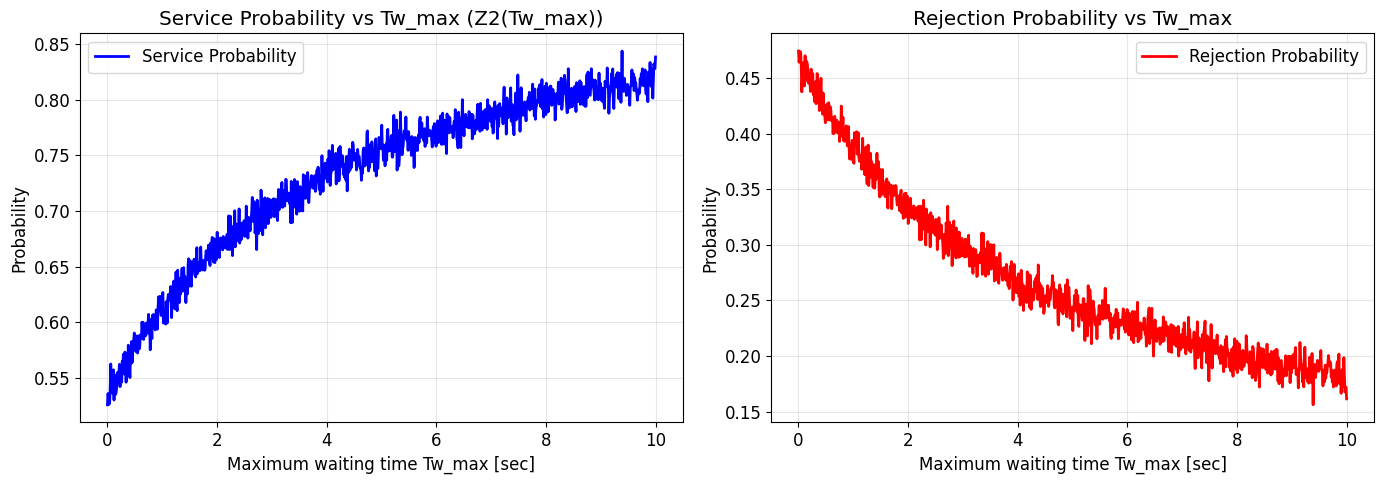

In [35]:
# Task 3.1: Plot service and rejection probabilities vs Tw_max
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot service probability
axes[0].plot(Tw_values, service_probs, 'b-', linewidth=2, label='Service Probability')
axes[0].set_xlabel('Maximum waiting time Tw_max [sec]')
axes[0].set_ylabel('Probability')
axes[0].set_title('Service Probability vs Tw_max (Z2(Tw_max))')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot rejection probability
axes[1].plot(Tw_values, rejection_probs, 'r-', linewidth=2, label='Rejection Probability')
axes[1].set_xlabel('Maximum waiting time Tw_max [sec]')
axes[1].set_ylabel('Probability')
axes[1].set_title('Rejection Probability vs Tw_max')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

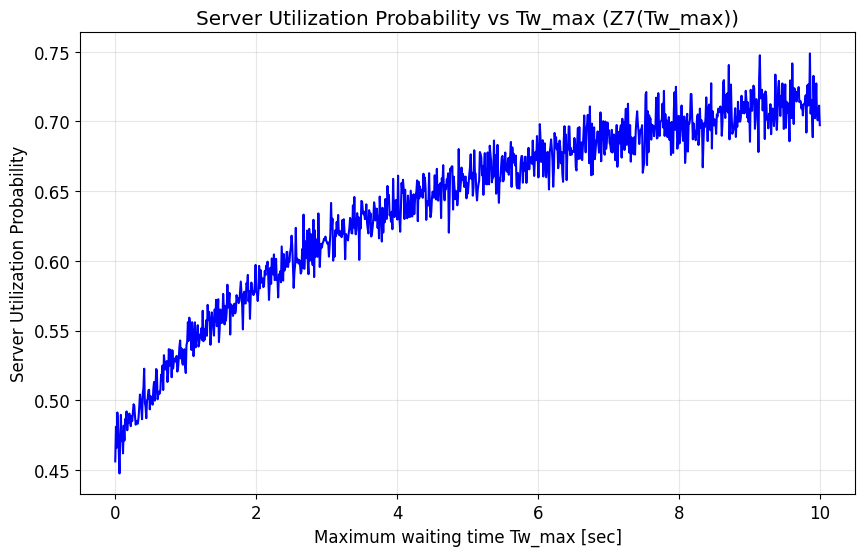

In [38]:
# Task 3.2: Plot server utilization probability vs Tw_max
plt.figure(figsize=(10, 6))
plt.plot(Tw_values, utilization_probs, 'b-')
plt.xlabel('Maximum waiting time Tw_max [sec]')
plt.ylabel('Server Utilization Probability')
plt.title('Server Utilization Probability vs Tw_max (Z7(Tw_max))')
plt.grid(True, alpha=0.3)
plt.show()

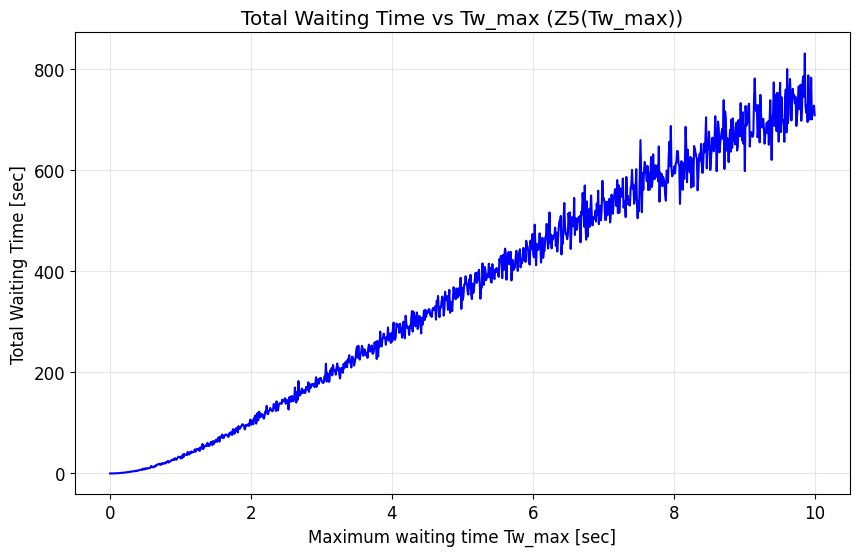

In [40]:
# Task 3.3: Plot total waiting time vs Tw_max
plt.figure(figsize=(10, 6))
plt.plot(Tw_values, total_waiting_times, 'b-')
plt.xlabel('Maximum waiting time Tw_max [sec]')
plt.ylabel('Total Waiting Time [sec]')
plt.title('Total Waiting Time vs Tw_max (Z5(Tw_max))')
plt.grid(True, alpha=0.3)
plt.show()

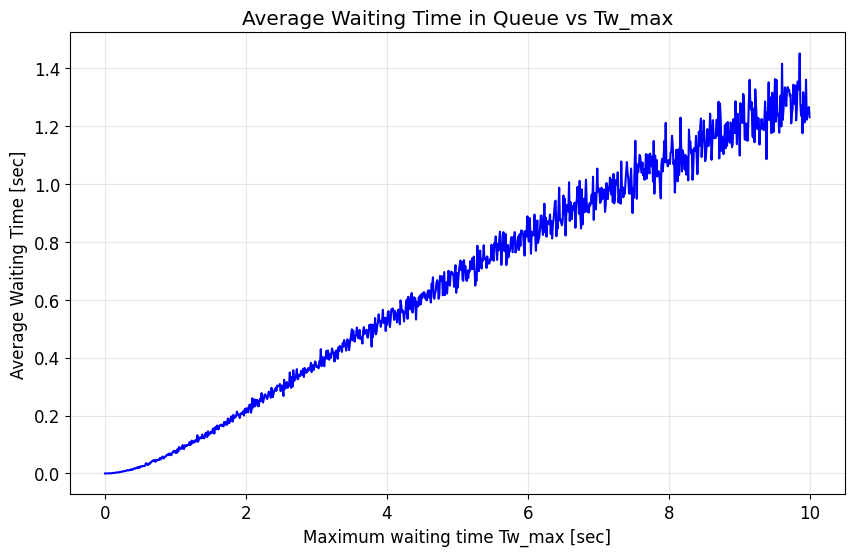

In [42]:
# Task 3.4: Plot average waiting time vs Tw_max
plt.figure(figsize=(10, 6))
plt.plot(Tw_values, avg_waiting_times, 'b-')
plt.xlabel('Maximum waiting time Tw_max [sec]')
plt.ylabel('Average Waiting Time [sec]')
plt.title('Average Waiting Time in Queue vs Tw_max')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Task 4.1: USING OUR PROGRAM TO FIND the optimal Tw value
print("\n" + "=" * 70)
print("TASK 4.1: USING SIMULATION PROGRAM TO FIND OPTIMAL Tw")
print("=" * 70)

# System parameters (from Task 2)
lambda_arrival = 0.7
mu_service = 0.8
T_simulation = 1000
num_runs = 10  # More runs for accuracy

# Constraints
min_service_prob = 0.8
min_utilization = 0.6
max_avg_wait_time = 0.35

print(f"System parameters: λ={lambda_arrival}, μ={mu_service}")
print(f"Constraints:")
print(f"  - Service probability ≥ {min_service_prob}")
print(f"  - Server utilization ≥ {min_utilization}")
print(f"  - Average waiting time ≤ {max_avg_wait_time} sec")
print("\n" + "=" * 70)
print("SEARCHING FOR OPTIMAL Tw...")
print("=" * 70)

# We'll search for Tw in a reasonable range
Tw_candidates = np.linspace(0.1, 5.0, 30)  # Search from 0.1 to 5.0 seconds

# Store results from our program
service_probs = []
utilization_probs = []
avg_waiting_times = []
valid_Tw_values = []
valid_results = []

print(f"\nTesting {len(Tw_candidates)} Tw candidates...")
print("-" * 85)
print(f"{'Tw':<8} {'Service Prob':<15} {'Utilization':<15} {'Avg Wait':<15} {'Status':<15}")
print("-" * 85)

for Tw in Tw_candidates:
    # USE OUR PROGRAM to get results for this Tw
    results = simulate_single_channel_system(
        lambda_arrival, mu_service, Tw, T_simulation, num_runs
    )
    
    # Store results
    service_probs.append(results['service_probability'])
    utilization_probs.append(results['utilization_probability'])
    avg_waiting_times.append(results['avg_waiting_time'])
    
    # Check if this Tw satisfies all constraints
    service_ok = results['service_probability'] >= min_service_prob
    util_ok = results['utilization_probability'] >= min_utilization
    wait_ok = results['avg_waiting_time'] <= max_avg_wait_time
    
    if service_ok and util_ok and wait_ok:
        status = "✓ VALID"
        valid_Tw_values.append(Tw)
        valid_results.append(results)
    else:
        # Show which constraints are violated
        violations = []
        if not service_ok:
            violations.append("Service")
        if not util_ok:
            violations.append("Util")
        if not wait_ok:
            violations.append("Wait")
        status = f"✗ ({', '.join(violations)})"
    
    print(f"{Tw:<8.2f} {results['service_probability']:<15.4f} "
          f"{results['utilization_probability']:<15.4f} "
          f"{results['avg_waiting_time']:<15.4f} {status}")

print("-" * 85)

if valid_Tw_values:
    # Found valid Tw values - choose the optimal one
    print(f"\n✅ Found {len(valid_Tw_values)} valid Tw values!")
    
    # Usually we want the smallest Tw that works (less waiting for customers)
    optimal_Tw = min(valid_Tw_values)
    # Find the index of this Tw in the original candidates
    optimal_idx = list(Tw_candidates).index(optimal_Tw)
    optimal_results = {
        'service_probability': service_probs[optimal_idx],
        'utilization_probability': utilization_probs[optimal_idx],
        'avg_waiting_time': avg_waiting_times[optimal_idx]
    }
    
    print("\n" + "=" * 70)
    print("OPTIMAL Tw FOUND!")
    print("=" * 70)
    print(f"Optimal Tw = {optimal_Tw:.4f} seconds")
    print(f"\nPerformance at optimal Tw:")
    print(f"  Service probability: {optimal_results['service_probability']:.4f} (≥{min_service_prob})")
    print(f"  Server utilization: {optimal_results['utilization_probability']:.4f} (≥{min_utilization})")
    print(f"  Average waiting time: {optimal_results['avg_waiting_time']:.4f} sec (≤{max_avg_wait_time})")
    
    print("\n" + "=" * 70)
    print("JUSTIFICATION")
    print("=" * 70)
    print(f"The optimal Tw value is {optimal_Tw:.4f} seconds because:")
    print(f"  1. It is the SMALLEST Tw value that satisfies ALL three constraints")
    print(f"  2. At this value:")
    print(f"     - Service probability = {optimal_results['service_probability']:.4f} ≥ {min_service_prob}")
    print(f"     - Server utilization = {optimal_results['utilization_probability']:.4f} ≥ {min_utilization}")
    print(f"     - Average waiting time = {optimal_results['avg_waiting_time']:.4f} ≤ {max_avg_wait_time}")
    print(f"  3. Choosing the smallest valid Tw minimizes the maximum time")
    print(f"     customers have to wait, which is better for user experience")
    print(f"     while still meeting all system requirements.")
    print(f"  4. Any Tw value smaller than {optimal_Tw:.4f} would violate at least")
    print(f"     one of the constraints (either service probability too low")
    print(f"     or utilization too low).")
    
    # Show the range of valid Tw values
    print(f"\nValid Tw range: {min(valid_Tw_values):.4f} to {max(valid_Tw_values):.4f} seconds")
    
    # Visualize the results with the optimal point
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))
    
    # Plot service probability
    axes[0].plot(Tw_candidates, service_probs, 'b-', linewidth=2, label='Service Probability')
    axes[0].axhline(y=min_service_prob, color='r', linestyle='--', label=f'Min required: {min_service_prob}')
    axes[0].axvline(x=optimal_Tw, color='g', linestyle='--', label=f'Optimal Tw: {optimal_Tw:.2f}')
    axes[0].fill_between(Tw_candidates, min_service_prob, 1, where=(np.array(Tw_candidates) >= optimal_Tw), 
                        alpha=0.2, color='green')
    axes[0].set_xlabel('Tw_max [sec]')
    axes[0].set_ylabel('Service Probability')
    axes[0].set_title('Service Probability vs Tw_max')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    axes[0].set_ylim([0, 1])
    
    # Plot server utilization
    axes[1].plot(Tw_candidates, utilization_probs, 'g-', linewidth=2, label='Server Utilization')
    axes[1].axhline(y=min_utilization, color='r', linestyle='--', label=f'Min required: {min_utilization}')
    axes[1].axvline(x=optimal_Tw, color='g', linestyle='--', label=f'Optimal Tw: {optimal_Tw:.2f}')
    axes[1].fill_between(Tw_candidates, min_utilization, 1, where=(np.array(Tw_candidates) >= optimal_Tw), 
                        alpha=0.2, color='green')
    axes[1].set_xlabel('Tw_max [sec]')
    axes[1].set_ylabel('Server Utilization')
    axes[1].set_title('Server Utilization vs Tw_max')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    axes[1].set_ylim([0, 1])
    
    # Plot average waiting time
    axes[2].plot(Tw_candidates, avg_waiting_times, 'orange', linewidth=2, label='Avg Waiting Time')
    axes[2].axhline(y=max_avg_wait_time, color='r', linestyle='--', label=f'Max allowed: {max_avg_wait_time}')
    axes[2].axvline(x=optimal_Tw, color='g', linestyle='--', label=f'Optimal Tw: {optimal_Tw:.2f}')
    axes[2].fill_between(Tw_candidates, 0, max_avg_wait_time, where=(np.array(Tw_candidates) <= optimal_Tw), 
                        alpha=0.2, color='green')
    axes[2].set_xlabel('Tw_max [sec]')
    axes[2].set_ylabel('Average Waiting Time [sec]')
    axes[2].set_title('Average Waiting Time vs Tw_max')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("\n NO VALID Tw FOUND WITH CURRENT PARAMETERS")
    print("=" * 70)
    print("With λ=0.7 and μ=0.8, NO Tw value satisfies all constraints.")
    print("\nThis is an important finding from our program!")
    print("It tells us that the system parameters need to be adjusted:")
    print("  - Increase service rate (μ) to reduce waiting times")
    print("  - Decrease arrival rate (λ) to reduce system load")
    print("  - Or relax one of the constraints")
    
    # Let's analyze why no Tw works
    print("\n" + "-" * 50)
    print("ANALYZING WHY NO Tw SATISFIES ALL CONSTRAINTS:")
    print("-" * 50)
    
    # Find best values for each metric
    max_service_idx = np.argmax(service_probs)
    max_util_idx = np.argmax(utilization_probs)
    min_wait_idx = np.argmin(avg_waiting_times)
    
    print(f"\nBest service probability: {max(service_probs):.4f} at Tw={Tw_candidates[max_service_idx]:.2f} sec")
    print(f"  (needs ≥{min_service_prob})")
    
    print(f"Best server utilization: {max(utilization_probs):.4f} at Tw={Tw_candidates[max_util_idx]:.2f} sec")
    print(f"  (needs ≥{min_utilization})")
    
    print(f"Best average waiting time: {min(avg_waiting_times):.4f} sec at Tw={Tw_candidates[min_wait_idx]:.2f} sec")
    print(f"  (needs ≤{max_avg_wait_time})")
    
    # Check each constraint separately
    print("\n" + "-" * 50)
    print("CONSTRAINT SATISFACTION ANALYSIS:")
    print("-" * 50)
    
    service_satisfied = [i for i, val in enumerate(service_probs) if val >= min_service_prob]
    if service_satisfied:
        print(f"✓ Service probability ≥ {min_service_prob} is satisfied for Tw ≥ {Tw_candidates[min(service_satisfied)]:.2f} sec")
    else:
        print(f"✗ Service probability ≥ {min_service_prob} is NEVER satisfied")
        print(f"  Maximum achieved: {max(service_probs):.4f}")
    
    util_satisfied = [i for i, val in enumerate(utilization_probs) if val >= min_utilization]
    if util_satisfied:
        print(f"✓ Server utilization ≥ {min_utilization} is satisfied for Tw ≥ {Tw_candidates[min(util_satisfied)]:.2f} sec")
    else:
        print(f"✗ Server utilization ≥ {min_utilization} is NEVER satisfied")
        print(f"  Maximum achieved: {max(utilization_probs):.4f}")
    
    wait_satisfied = [i for i, val in enumerate(avg_waiting_times) if val <= max_avg_wait_time]
    if wait_satisfied:
        print(f"✓ Average waiting time ≤ {max_avg_wait_time} is satisfied for Tw ≤ {Tw_candidates[max(wait_satisfied)]:.2f} sec")
    else:
        print(f"✗ Average waiting time ≤ {max_avg_wait_time} is NEVER satisfied")
        print(f"  Minimum achieved: {min(avg_waiting_times):.4f} sec")
    
    # Find the best compromise (closest to meeting all constraints)
    print("\n" + "-" * 50)
    print("BEST COMPROMISE (closest to meeting all constraints):")
    print("-" * 50)
    
    # Calculate how close each point is to meeting all constraints
    best_score = float('inf')
    best_idx = -1
    
    for i in range(len(Tw_candidates)):
        # Calculate gaps (how far from each constraint)
        service_gap = max(0, min_service_prob - service_probs[i])
        util_gap = max(0, min_utilization - utilization_probs[i])
        wait_gap = max(0, avg_waiting_times[i] - max_avg_wait_time)
        
        # Total weighted gap (lower is better)
        total_gap = service_gap + util_gap + wait_gap * 10  # Weight waiting time more
        
        if total_gap < best_score:
            best_score = total_gap
            best_idx = i
    
    print(f"Best compromise at Tw = {Tw_candidates[best_idx]:.2f} seconds:")
    print(f"  Service probability: {service_probs[best_idx]:.4f} (needs {min_service_prob})")
    print(f"  Server utilization: {utilization_probs[best_idx]:.4f} (needs {min_utilization})")
    print(f"  Average waiting time: {avg_waiting_times[best_idx]:.4f} sec (needs ≤{max_avg_wait_time})")
    
    print("\n" + "=" * 70)
    print("CONCLUSION")
    print("=" * 70)
    print("Based on our simulation program, we can conclude that:")
    print("  1. With λ=0.7 and μ=0.8, it's IMPOSSIBLE to satisfy all three constraints")
    print("  2. The constraints are conflicting because:")
    print("     - High service probability requires large Tw (customers wait longer)")
    print("     - Low waiting time requires small Tw (but then service probability drops)")
    print("  3. To achieve all constraints, we would need to:")
    print("     - Increase service rate (μ) to at least 0.9-1.0")
    print("     - OR decrease arrival rate (λ) to 0.6 or lower")
    print("     - OR relax the average waiting time constraint to ~0.5 sec")


TASK 4.1: USING SIMULATION PROGRAM TO FIND OPTIMAL Tw
System parameters: λ=0.7, μ=0.8
Constraints:
  - Service probability ≥ 0.8
  - Server utilization ≥ 0.6
  - Average waiting time ≤ 0.35 sec

SEARCHING FOR OPTIMAL Tw...

Testing 30 Tw candidates...
-------------------------------------------------------------------------------------
Tw       Service Prob    Utilization     Avg Wait        Status         
-------------------------------------------------------------------------------------
0.10     0.5424          0.4815          0.0013          ✗ (Service, Util)
0.27     0.5502          0.4886          0.0074          ✗ (Service, Util)
0.44     0.5824          0.4959          0.0169          ✗ (Service, Util)
0.61     0.5852          0.5123          0.0326          ✗ (Service, Util)
0.78     0.5952          0.5229          0.0475          ✗ (Service, Util)
0.94     0.6141          0.5234          0.0687          ✗ (Service, Util)
1.11     0.6117          0.5472          0.0887     